In [1]:
import numpy as np                  
import matplotlib.pyplot as plt     
import pandas as pd                 
import seaborn as sns     
import statsmodels.api as sm
import math
import seaborn as sns

from sklearn.decomposition import PCA
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.tools.eval_measures import mse, rmse, meanabs, stde
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from statistics import mean
from sklearn.model_selection import train_test_split


In [11]:
import csv
url22 = './predictions_efficientStage22.csv'
df22 = pd.read_csv(url22, )
df22.head()

,preds
0,2.43
1,2.41
2,2.41
3,2.40
4,2.40


In [16]:
url223 = './predictions_resnetStage22.csv'
df223 = pd.read_csv(url223 )
df223.head()

,preds
0,1.62
1,1.50
2,1.47
3,1.49
4,1.47


In [19]:
urlreal = './real_resnetStage22.csv'
dfreal = pd.read_csv(urlreal )
dfreal.head()

,real
0,2.45
1,2.34
2,2.33
3,2.32
4,2.31


Text(0.5, 0, 'Time')

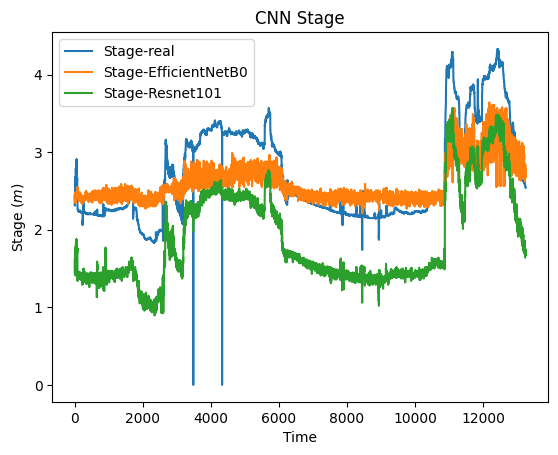

In [29]:
fig, ax = plt.subplots()
X = np.linspace(0, len(df22), len(df22))
ax.plot( X, dfreal, X, df22, X, df223)
ax.legend(["Stage-real", "Stage-EfficientNetB0", "Stage-Resnet101"])
ax.set_title("CNN Stage")
ax.set_ylabel("Stage ($m$)")
ax.set_xlabel("Time")

In [34]:
url2 = './2012_2019_PlatteRiverWeir_features_merged_all.csv'
df = pd.read_csv(url2)
df['Year'] = df[' CaptureTime'].str.slice(0, 4)
dfTrain = df[df['Year'] != '2015']
dfTrain = dfTrain[dfTrain['Year'] != '2016']
dfTrain = dfTrain[dfTrain['Year'] != '2017']

In [36]:
preds = df22[['preds']]
preds = preds.to_numpy()
xtrainx = dfTrain[[' Stage']].to_numpy()
ytrainy = dfTrain[[' Discharge']].to_numpy()
ytrainy

array([[916.],
       [916.],
       [873.],
       ...,
       [434.],
       [434.],
       [434.]])

In [44]:
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse, rmse, meanabs, stde
from sklearn.ensemble import RandomForestRegressor
Y_Realx = dfreal[['real']].to_numpy()

In [48]:
rdm = RandomForestRegressor(n_estimators=20, random_state=0)
rdm.fit(xtrainx, ytrainy)

y_rdm_test_pred = pd.DataFrame(rdm.predict(preds))
ap = {"Test":{
        "MAE": meanabs(y_rdm_test_pred, Y_Realx)[0],
        "MSE": mse(y_rdm_test_pred, Y_Realx)[0],
        "RMSE": rmse(y_rdm_test_pred, Y_Realx)[0],
        "R^2": r2_score(Y_Realx, y_rdm_test_pred),
        "Standard Error": stde(y_rdm_test_pred, Y_Realx, ddof = 52)[0],
        "Y test": Y_Realx,
        "Y test predicted": y_rdm_test_pred}}
ap

/tmp/ipykernel_307/641798920.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(xtrainx, ytrainy)


{'Test': {'MAE': 486.47987011502136,
  'MSE': 326017.76586632855,
  'RMSE': 570.9796545117248,
  'R^2': -845147.7347375205,
  'Standard Error': 299.51162496026564,
  'Y test': array([[2.45],
         [2.34],
         [2.33],
         ...,
         [2.54],
         [2.54],
         [2.54]]),
  'Y test predicted':                 0
  0      320.119649
  1      296.138314
  2      296.138314
  3      286.716055
  4      286.716055
  ...           ...
  13243  566.322979
  13244  617.985725
  13245  633.645289
  13246  644.090022
  13247  686.346078
  
  [13248 rows x 1 columns]}}

In [63]:
dfTest = df[df['Year'] <= '2017']
dfTest = dfTest[dfTest['Year'] >= '2015']
len(dfTest)

13248

In [57]:
predsRes = df223[['preds']]
predsRes = predsRes.to_numpy()
len(predsRes)

13248

In [51]:
y_rdm_test_pred_Res = pd.DataFrame(rdm.predict(predsRes))
ap = {"Test":{
        "MAE": meanabs(y_rdm_test_pred, Y_Realx)[0],
        "MSE": mse(y_rdm_test_pred, Y_Realx)[0],
        "RMSE": rmse(y_rdm_test_pred, Y_Realx)[0],
        "R^2": r2_score(Y_Realx, y_rdm_test_pred),
        "Standard Error": stde(y_rdm_test_pred, Y_Realx, ddof = 52)[0],
        "Y test": Y_Realx,
        "Y test predicted": y_rdm_test_pred}}
ap

{'Test': {'MAE': 486.47987011502136,
  'MSE': 326017.76586632855,
  'RMSE': 570.9796545117248,
  'R^2': -845147.7347375205,
  'Standard Error': 299.51162496026564,
  'Y test': array([[2.45],
         [2.34],
         [2.33],
         ...,
         [2.54],
         [2.54],
         [2.54]]),
  'Y test predicted':                 0
  0      320.119649
  1      296.138314
  2      296.138314
  3      286.716055
  4      286.716055
  ...           ...
  13243  566.322979
  13244  617.985725
  13245  633.645289
  13246  644.090022
  13247  686.346078
  
  [13248 rows x 1 columns]}}

Text(0.5, 0, 'Time')

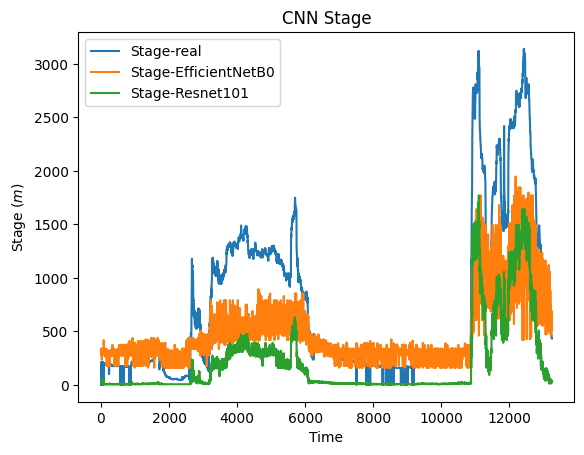

In [61]:
fig, ax = plt.subplots()
X = np.linspace(0, len(df22), len(df22))
ax.plot( X, dfTest[[' Discharge']].to_numpy(), X, y_rdm_test_pred, X, y_rdm_test_pred_Res)
ax.legend(["Stage-real", "Stage-EfficientNetB0", "Stage-Resnet101"])
ax.set_title("CNN Stage")
ax.set_ylabel("Stage ($m$)")
ax.set_xlabel("Time")